# <center> Determining a person’s sex by height and weight</center>
#  <center>With help of neural networks</center>

In [98]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### - Data

In [99]:
data = {'Weight':[80.0, 53.0, 55.0, 73.0, 76.0, 60.0, 80.0, 60.0],
        'Height':[ 185.0, 168.0, 169.0, 194.0, 180.0, 165.0, 185.0, 167.0],
        'Sex':[0, 1, 1, 0, 0, 1, 0, 1]}

data = pd.DataFrame(data)
data.shape
data.head(data.shape[0])

,Weight,Height,Sex
0,80.0,185.0,0
1,53.0,168.0,1
2,55.0,169.0,1
3,73.0,194.0,0
4,76.0,180.0,0
5,60.0,165.0,1
6,80.0,185.0,0
7,60.0,167.0,1


In [100]:
features = ['Weight', 'Height']
for feature in features:
    data[feature]=data[feature].fillna(data[feature].mean())
X = data[features]
y = data['Sex']
mean = np.mean(X, axis = 0)
mean = np.array(list(map(int, mean)))
#print("Array of medium:\n", mean)
X_mean = X - mean
normalized_X = preprocessing.normalize(X_mean)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3, random_state = 1337)
print(X_train)
print(y_train)

[[ 0.32  0.95]
 [ 0.82  0.57]
 [ 0.91  0.41]
 [-0.54 -0.84]
 [-0.61 -0.79]]
3    0
0    0
4    0
5    1
7    1
Name: Sex, dtype: int64


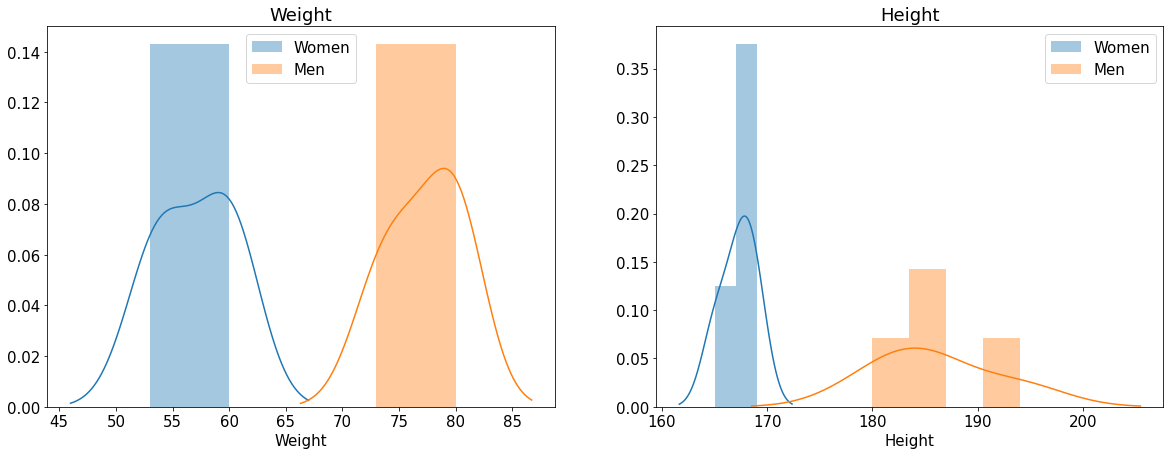

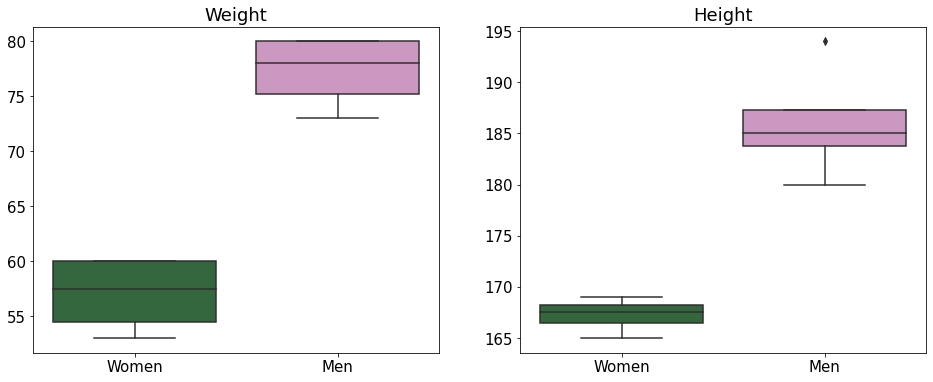

In [101]:

        
fig, ax = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)
gr = ['Weight', 'Height']
for i in range(2):
    sns.distplot(data[data['Sex']== 1][gr[i]],ax=ax[i])
    sns.distplot(data[data['Sex']== 0][gr[i]],ax=ax[i])
    ax[i].set_title(gr[i])
   # ax[i].set_xlabel('Mark')
    ax[i].legend(('Women','Men'))

fig2, axb = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sex = [1, 0]
sex_name = ['Women', 'Men']
param = ['Weight', 'Height']
for i in range(2):
    sns.boxplot(data = [data[param[i]][data['Sex']==sex[0]],data[param[i]][data['Sex']==sex[1]]],ax=axb[i],palette="cubehelix")
    axb[i].set_title(param[i])
    axb[i].set_xticklabels(sex_name)

### - Correlation

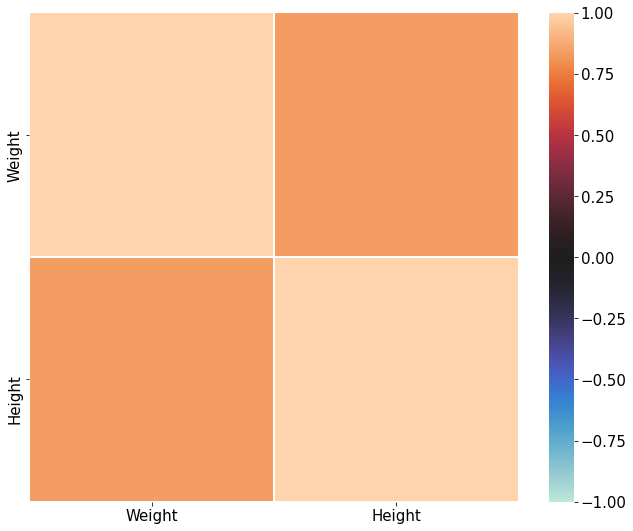

In [102]:
cols = ['Weight', 'Height']
fig, ax = plt.subplots(figsize=(11, 9))
data_correl = data[cols].corr()
sns.heatmap(data_correl, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5)

### - Neural network

In [103]:

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid11
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = np.array(x)
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,3)
        self.weights3 = np.random.rand(3,1)
        self.b1 = np.zeros((self.input.shape[0], 1)) 
        self.b2 = np.zeros((self.input.shape[0], 1)) 
        self.b3 = 0
        self.y = np.array(y)
        self.y.resize(self.y.shape[0], 1)
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1) + self.b1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.b2)
        self.layer3 = sigmoid(np.dot(self.layer2, self.weights3) + self.b3)
        return self.layer3
    
    def result(self, x):
        layer1 = sigmoid(np.dot(x, self.weights1))
        layer2 = sigmoid(np.dot(layer1, self.weights2))
        layer3 = sigmoid(np.dot(layer2, self.weights3))
        return layer3
        
    def backprop(self):
        d_weights3_prep = (self.y -self.output)*sigmoid_derivative(self.output)
        d_weights3 = np.dot(self.layer2.T, d_weights3_prep)
        d_weights2_prep = np.dot(d_weights3_prep, self.weights3.T)*sigmoid_derivative(self.layer2)
        d_weights2 = np.dot(self.layer1.T, d_weights2_prep)
        d_weights1_prep = np.dot(d_weights2_prep, self.weights2.T)*sigmoid_derivative(self.layer1)
        d_weights1 = np.dot(self.input.T, d_weights1_prep)
        
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3
        
        

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
      


### - Neural network training normalized data

In [104]:
NN = NeuralNetwork(X_train,y_train)
loss = []
for i in range(1500): # trains the NN 1,000 times
    ff = NN.feedforward()
    loss.append(np.mean(np.square(np.array(y_train - np.squeeze(ff)))))
    
    if i % 100 == 0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X_train))
        print ("Actual Output: \n" + str(y_train))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(loss[-1])) # mean sum squared loss
        print ("\n")

    NN.train(X_train, y_train)
    res = NN.result(X_test)

for iteration # 0

Input : 
[[ 0.32  0.95]
 [ 0.82  0.57]
 [ 0.91  0.41]
 [-0.54 -0.84]
 [-0.61 -0.79]]
Actual Output: 
3    0
0    0
4    0
5    1
7    1
Name: Sex, dtype: int64
Predicted Output: 
[[0.79]
 [0.79]
 [0.79]
 [0.76]
 [0.76]]
Loss: 
0.39657811895494366


for iteration # 100

Input : 
[[ 0.32  0.95]
 [ 0.82  0.57]
 [ 0.91  0.41]
 [-0.54 -0.84]
 [-0.61 -0.79]]
Actual Output: 
3    0
0    0
4    0
5    1
7    1
Name: Sex, dtype: int64
Predicted Output: 
[[0.09]
 [0.08]
 [0.08]
 [0.89]
 [0.89]]
Loss: 
0.008718585015336953


for iteration # 200

Input : 
[[ 0.32  0.95]
 [ 0.82  0.57]
 [ 0.91  0.41]
 [-0.54 -0.84]
 [-0.61 -0.79]]
Actual Output: 
3    0
0    0
4    0
5    1
7    1
Name: Sex, dtype: int64
Predicted Output: 
[[0.04]
 [0.04]
 [0.04]
 [0.95]
 [0.95]]
Loss: 
0.0019338745229370573


for iteration # 300

Input : 
[[ 0.32  0.95]
 [ 0.82  0.57]
 [ 0.91  0.41]
 [-0.54 -0.84]
 [-0.61 -0.79]]
Actual Output: 
3    0
0    0
4    0
5    1
7    1
Name: Sex, dtype: int64
Predicte

### - Plotting errors

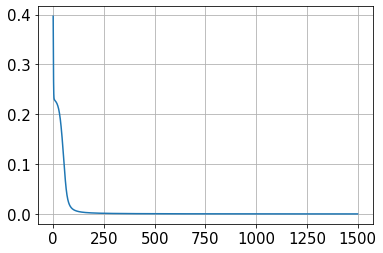

In [105]:

loss_np = np.array(loss)
x_loss = np.arange(0, 1500, 1)
plt.grid()
plt.plot(x_loss, loss_np, label="loss")

In [106]:
def convert_back(array):
    converted = []
    for x in array:
        if x >= 0.5:
            converted.append(1)
        else:
            converted.append(0)
    return converted
convert_back(predict3)

[0, 1, 1]

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predict = convert_back(model.predict(X_test))

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
predict2 = convert_back(model2.predict(X_test))

model3 = SVR()
model3.fit(X_train, y_train)
predict3 = convert_back(model3.predict(X_test))


#model.score(X_test, y_test)

c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\оксана\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 1 1]
[0 1 1]
[0 1 1]
Confusion matrix, without normalization
[[1 0]
 [0 2]]


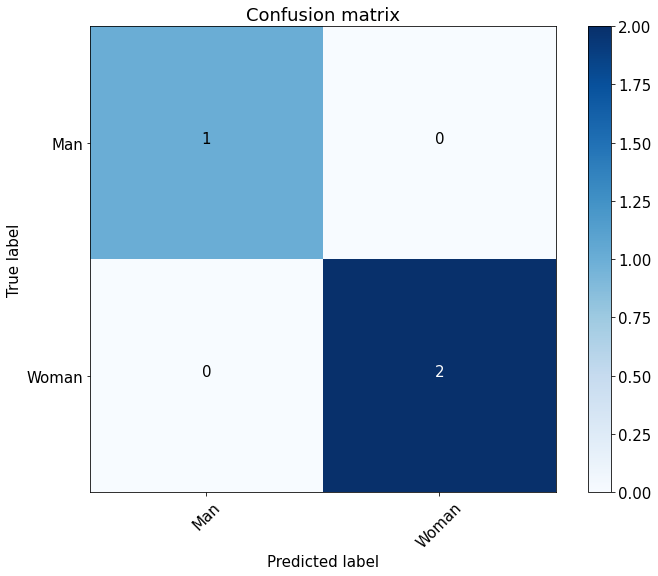

In [108]:


from sklearn.metrics import confusion_matrix
import itertools
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)
print(np.array(y_test))
y_result = []
for x in res:
    if x > 0.5:
        y_result.append(1)
    else:
        y_result.append(0)  
print(np.array(y_test))
print(np.array(y_result))
cnf_matrix = confusion_matrix(np.array(y_test), np.array(y_result))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Man', 'Woman'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [109]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_result, target_names=['Man', 'Woman'])
print(report)

              precision    recall  f1-score   support

         Man       1.00      1.00      1.00         1
       Woman       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [110]:
def logloss_crutch(y_true, y_pred, eps=1e-15):

    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
print(logloss_crutch(np.array(y_test), np.array(np.squeeze(res))))
#print(np.array(y_test))
#print( np.array(np.squeeze(res)))

[0.01 0.01 0.01]


### <center>Report on the work of SVR algorithm</center>

In [111]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, predict3, target_names=['Man', 'Woman'])
print(report)

              precision    recall  f1-score   support

         Man       1.00      1.00      1.00         1
       Woman       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

